# 0. Import Relevant Packages / Modules

In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

import seaborn as sns
sns.set(style="whitegrid")

# 1. Sourcing Financial Data

In [450]:
financial_statements = pd.read_csv('jj_data.csv', thousands=',')

## 1.1 Extract Income Statement

In [451]:
income_statement = financial_statements.iloc[2:15, 1:]
income_statement = income_statement.transpose()
income_statement.head()

#make the first row the header
new_header = income_statement.iloc[0]
income_statement = income_statement[1:]
income_statement.columns = new_header

#Convert the datatypes to numeric and deal with the commas
for column in income_statement.columns:
    income_statement[column] = pd.to_numeric(income_statement[column].str.replace(',',''), errors='coerce')
    
#Set the Unname:1 column to be the index
income_statement.set_index('in million USD') 

Unnamed: 1,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),Non-Operating Income (Loss),"Pretax Income (Loss), Adjusted",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Income (Loss) Including Minority Interest,Minority Interest
in million USD,,,,,,,,,,,,
NaN,61587,-18792,42795,-26268,16527,420,16947,0,16947,-3613,13334,0.0
NaN,65030,-20360,44670,-28517,16153,-3223,12930,-569,12361,-2689,9672,0.0
NaN,67224,-21658,45566,-28534,17032,-2094,14938,-1163,13775,-3261,10514,339.0
NaN,71312,-22342,48970,-30013,18957,-2906,16051,-580,15471,-1640,13831,NaN
NaN,74331,-22746,51585,-30448,21137,-396,20741,-178,20563,-4240,16323,NaN
NaN,70074,-21536,48538,-30249,18289,1640,19929,-733,19196,-3787,15409,NaN
NaN,71890,-21685,50205,-29040,21165,-842,20323,-520,19803,-3263,16540,NaN
NaN,76450,-25439,51011,-32114,18897,-507,18390,-717,17673,-16373,1300,NaN
NaN,81581,-27091,54490,-33315,21175,-1799,19376,-1377,17999,-2702,15297,NaN


## 1.2 Extract Balance Sheet

In [452]:
balance_sheet = financial_statements.iloc[18:44, 1:]
balance_sheet = balance_sheet.transpose()

#make the first row the header
balance_sheet_new_header = balance_sheet.iloc[0]
balance_sheet = balance_sheet[1:]
balance_sheet.columns = balance_sheet_new_header

balance_sheet.drop(["Assets", "Liabilities"], axis=1, inplace=True)

#Convert the datatypes to numeric and deal with the commas
for column in balance_sheet.columns:
    balance_sheet[column] = pd.to_numeric(balance_sheet[column].str.replace(',',''), errors='coerce')

#Set the Unname:1 column to be the index
balance_sheet.set_index('in million USD')

Unnamed: 1,"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Other Short Term Assets,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,...,Other Long Term Liabilities,Total Noncurrent Liabilities,Total Liabilities,Preferred Equity,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Other Equity,Equity Before Minority Interest,Total Equity
in million USD,,,,,,,,,,,,,,,,,,,,,
NaN,27658,9774,5378,4497,47307,14553,41048,55601,102908,15455,...,14101,23257,46329,0.0,3120,-20783,77773,-3531,56579,56579
NaN,32261,10581,6285,5189,54316,14739,44589,59328,113644,16153,...,20784,33753,56564,0.0,3120,-21659,81251,-5632,57080,57080
NaN,21089,11309,7495,6223,46116,16097,59134,75231,121347,19586,...,20770,32259,56521,0.0,3120,-18476,85992,-5810,64826,64826
NaN,29206,11713,7878,7610,56407,16710,59566,76276,132683,20823,...,19627,32955,58630,0.0,3120,-15700,89493,-2860,74053,74053
NaN,33089,10985,8184,3486,55744,16126,58488,74614,130358,21393,...,20453,35575,60606,0.0,3120,-19891,97245,-10722,69752,69752
NaN,38376,10734,8053,3047,60210,15905,57296,73201,133411,20743,...,21657,34514,62261,0.0,3120,-22684,103879,-13165,71150,71150
NaN,41907,11699,8144,3282,65032,15912,60264,76176,141208,21603,...,22061,44503,70790,NaN,3120,-28352,110551,-14901,70418,70418
NaN,18296,13490,8765,2537,43088,17005,97210,114215,157303,26631,...,35931,66606,97143,NaN,3120,-31554,101793,-13199,60160,60160
NaN,19687,14098,8599,2699,45083,17035,90836,107871,152954,28434,...,34288,61972,93202,NaN,3120,-34362,106216,-15222,59752,59752


## 1.3 Extract Cash Flow Statement

In [453]:
cashflow_statement = financial_statements.iloc[47:65, 1:]
cashflow_statement = cashflow_statement.transpose()

#make the first row the header
cashflow_new_header = cashflow_statement.iloc[0]
cashflow_statement = cashflow_statement[1:]
cashflow_statement.columns = cashflow_new_header

#Convert the datatypes to numeric and deal with the commas
for column in cashflow_statement.columns:
    cashflow_statement[column] = pd.to_numeric(cashflow_statement[column].str.replace(',',''), errors='coerce')

#Set the Unname:1 column to be the index
cashflow_statement.set_index('in million USD')

Unnamed: 1,Net Income/Starting Line,Depreciation & Amortization,Non-Cash Items,Change in Working Capital,Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash From Acquisitions & Divestitures,Other Investing Activities,Cash from Investing Activities,Dividends Paid,Cash From (Repayment of) Debt,Cash From (Repurchase of) Equity,Other Financing Activities,Cash from Financing Activities,Net Cash Before FX,Effect of Foreign Exchange Rates
in million USD,,,,,,,,,,,,,,,,,
NaN,13334,2939,982,-870,16385,-1860,-4687,-1269,-38,-7854,-5804,2395,-1571,0,-4980,3551,-6
NaN,9672,3158,-23,1491,14298,-1551,514,-2797,-778,-4612,-6156,2983,-1279,0,-4452,5234,-47
NaN,10853,3666,1938,-1061,15396,-1425,1363,-4486,38,-4510,-6614,-3666,-10199,-83,-20562,-9676,45
NaN,13831,4104,307,-828,17414,-3137,-865,-835,-266,-5103,-7286,2028,-889,56,-6091,6220,-204
NaN,16323,3895,-681,-827,18710,917,-10794,-2129,-299,-12305,-7768,850,-5581,0,-12499,-6094,-310
NaN,15409,3746,-1215,1629,19569,1,-6679,-954,-103,-7735,-8173,1379,-4285,-57,-11136,698,-1489
NaN,16540,3754,246,-1773,18767,-1959,1830,-4509,-123,-4761,-8621,7875,-7790,-15,-8551,5455,-215
NaN,1300,5642,2873,11241,21056,-1447,21964,-35151,-234,-14868,-8943,6754,-5296,-188,-7673,-1485,337
NaN,15297,6929,-28,3,22201,-467,-1337,-899,-464,-3167,-9494,-3949,-4919,-148,-18510,524,-241


# 2. Building the DCF

## 2.1 Key Model Assumptions

In [454]:
#Get years of DCF model
current_year_str = financial_statements.iloc[2][-1]
current_year = 2000+ int(current_year_str[-2:])

dcf_years = list(range(current_year-9, current_year+1))

#Assume year of exit and layout years of projections
years_to_exit = 5
year_of_exit = current_year + years_to_exit
projections_years = list(range(current_year, year_of_exit+1))

#For revenue, it is assumed that the growth rate over a previous number of years (the "lookback period") continues until exit
Revenue_growth_lookback_period = 3

#For EBIT, D&A, Capex, and Net Working Capital, it is assumed that the ratio of each quantity to the Revenue until exit is equal to the ratio observed over a certain previous number of years (the "lookback period")
EBIT_margin_lookback_period = 3
DA_margin_lookback_period = 3
Capex_margin_lookback_period = 3
net_working_capital_margin_lookback_period =3

#For the dividends, it is assumed that the growth rate over in total dividends paid observed over a previous number of years (the "lookbackperiod") is observed for one year into the projections
dividend_growth_rate_lookback_period = 3

#Key company metrics
current_market_cap = 129.95*2634594535/1000000
common_shares_outstanding = 2634594535/1000000

## 2.2 Forecast the free cash flows

### 2.2.1 Calculate the historical FCFF

In [455]:
#Create new dataframe for the DCF
dcf = income_statement[['Revenue']].copy()


#For simplicity, it is assumed that EBIT = Operating Income plus non-operating income
dcf['EBIT'] = income_statement['Operating Income (Loss)'] + income_statement['Non-Operating Income (Loss)'] 
dcf['Year'] = dcf_years

#Assume a tax rate and account for taxes
marginal_tax_rate = income_statement['Income Tax (Expense) Benefit, net'][-1] / income_statement['Pretax Income (Loss)'][-1]
dcf['Provision_for_Taxes'] = - marginal_tax_rate * dcf['EBIT']

dcf['NOPAT'] = dcf['EBIT'] + dcf['Provision_for_Taxes'] #Net Operating Profit After Tax

dcf['D&A'] = cashflow_statement['Depreciation & Amortization']

dcf['Capex'] = balance_sheet['Property, Plant & Equipment, Net'].diff() #Using additions to property, plant and equipment as a proxy of Capex (whereas should also minus Depreciation, but this is not necessarily split out from Amortisation)

dcf['net_working_capital'] = balance_sheet['Total Current Assets'] - balance_sheet['Total Current Liabilities']
dcf['change_in_net_working_capital'] = dcf['net_working_capital'].diff()

#For simplicity we assume there are no other changes in operating assets / liabilities
dcf['EBITDA'] = dcf['EBIT'] + dcf['D&A']
dcf['FCFF'] = dcf['NOPAT'] + dcf['D&A'] - dcf['change_in_net_working_capital'] - dcf['Capex']

### 2.2.2 Project the future FCFF

In [456]:
#Create the projections dataframe including years from the current year to the exit year
projections = pd.DataFrame(index=projections_years, columns=dcf.columns).head(len(projections_years))   
projections['Year'] = projections_years

#Fill the first row of the projections dataframe with the last row of the DCF dataframe
for column in projections.columns:
    projections.iloc[0, projections.columns.get_loc(column)] = dcf[column].iloc[-1]

In [457]:
#Use the average of the last years of revenue growth to project the future revenue growth - the number of years for the lookback period is specified in the assumptions
dcf['Revenue_growth'] = dcf['Revenue'].pct_change()
projected_revenue_growth = np.average(dcf['Revenue_growth'].tail(Revenue_growth_lookback_period))

#Define a function that takes the previous year's revenue and predicts future revenues based on the assumed projected revenue growth rate
def revenue_projecter(row):
    if row['Year'] == dcf['Year'].iloc[-1]:
        return dcf['Revenue'].iloc[-1]
    else:
        return dcf['Revenue'].iloc[-1] * ((1+projected_revenue_growth)**(row['Year']-dcf['Year'].iloc[-1]))
    
#Apply the revenue prediction function to the projections
projections['Revenue'] = projections.apply(lambda row: revenue_projecter(row), axis=1)

In [458]:
#Use the average of the last years of the EBIT margin to find the EBIT - the number of years for the lookback period is specified in the assumptions
dcf['EBIT_margin'] = dcf['EBIT'] / dcf['Revenue']
projected_EBIT_margin = np.average(dcf['EBIT_margin'].tail(EBIT_margin_lookback_period))

#Define a function that takes the average of the previous years EBIT margin and predicts future EBIT based on the projected revenues - the number of years for the lookback period is specified in the assumptions
def EBIT_projecter(row):
    if row['Year'] == dcf['Year'].iloc[-1]:
        return dcf['EBIT'].iloc[-1]
    else:
        return row['Revenue']*projected_EBIT_margin

#Apply the EBIT prediction function to the projections
projections['EBIT'] = projections.apply(lambda row: EBIT_projecter(row), axis=1)

In [459]:
#Define a function that applies the previously calculated marginal_tax_rate to the projected EBIT to find the Provision_for_Taxes
def Provision_for_Taxes_projecter(row):
    if row['Year'] == dcf['Year'].iloc[-1]:
        return dcf['Provision_for_Taxes'].iloc[-1]
    else:
        return -row['EBIT']*marginal_tax_rate

#Apply the Provision_for_Taxes prediction function to the projections
projections['Provision_for_Taxes'] = projections.apply(lambda row: Provision_for_Taxes_projecter(row), axis=1)

In [460]:
#Find the Net Operating Profit after Tax using the projections
projections['NOPAT'] = projections['EBIT'] + projections['Provision_for_Taxes']

In [461]:
#Use the average of the last years of the D&A margin to find the D&A to the projections - the number of years for the lookback period is specified in the assumptions
def EBIT_projecter(row):
    dcf['D&A_margin'] = dcf['D&A'] / dcf['Revenue']
    projected_DA_margin = np.average(dcf['D&A_margin'].tail(DA_margin_lookback_period))
    
#Define a function that takes the average of the previous years D&A margin and predicts future D&A based on the projected revenues
def DA_projecter(row):
    if row['Year'] == dcf['Year'].iloc[-1]:
        return dcf['D&A'].iloc[-1]
    else:
        return row['Revenue']*projected_DA_margin

#Apply the D&A prediction function to the projections 
projections['D&A'] = projections.apply(lambda row: DA_projecter(row), axis=1)

In [462]:
#Use the average of the last years of the Capex margin to find the Capex - the number of years for the lookback period is specified in the assumptions
dcf['Capex_margin'] = dcf['Capex'] / dcf['Revenue']
projected_capex_margin = np.average(dcf['Capex_margin'].tail(Capex_margin_lookback_period))

#Define a function that takes the average of the previous years Capex margin and predicts future Capex based on the projected revenues - the number of years for the lookback period is specified in the assumptions
def capex_projecter(row):
    if row['Year'] == dcf['Year'].iloc[-1]:
        return dcf['Capex'].iloc[-1]
    else:
        return row['Revenue']*projected_capex_margin

#Apply the Capex prediction function to the projections
projections['Capex'] = projections.apply(lambda row: capex_projecter(row), axis=1)

In [463]:
#Use the average of the last years of the NWC margin to find the NWC - the number of years for the lookback period is specified in the assumptions
dcf['net_working_capital_margin'] = dcf['net_working_capital'] / dcf['Revenue']
projected_net_working_capital_margin = np.average(dcf['net_working_capital_margin'].tail(net_working_capital_margin_lookback_period))

#Define a function that takes the average of the previous years NWC margin and predicts future NWC based on the projected revenues 
def nwc_projecter(row):
    if row['Year'] == dcf['Year'].iloc[-1]:
        return dcf['net_working_capital'].iloc[-1]
    else:
        return row['Revenue']*projected_net_working_capital_margin

#Apply the NWC prediction function to data and find the change in net working capital
projections['net_working_capital'] = projections.apply(lambda row: nwc_projecter(row), axis=1)

projections['change_in_net_working_capital'] = projections['net_working_capital'].diff()
projections.iloc[0, projections.columns.get_loc('change_in_net_working_capital')] = dcf['change_in_net_working_capital'].iloc[-1]

In [464]:
#Calculate the EBITDA by summing the projected EBIT and projected D&A, then calculate the FCFF
projections['EBITDA'] = projections['EBIT'] + projections['D&A']
projections['FCFF'] = projections['NOPAT'] + projections['D&A'] - projections['change_in_net_working_capital'] - projections['Capex']

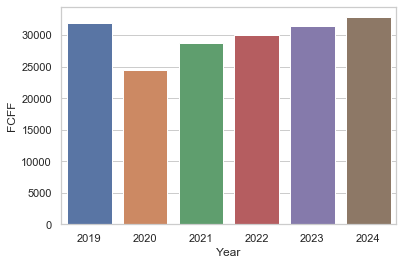

In [465]:
#Small graphical analysis to look at the predicted FCFF
ax = sns.barplot(x="Year", y="FCFF", data=projections)

## 2.3 Calculate the WACC (weighted average cost of capital)

### 2.3.1 Cost of Equity

In [466]:
#Calculate the dividend growth rate rate over the last years
dividend_growth_rate = (cashflow_statement['Dividends Paid'][-1]/cashflow_statement['Dividends Paid'][-dividend_growth_rate_lookback_period])**(1/dividend_growth_rate_lookback_period)-1

#Project the dividend next year
projected_next_dividend = cashflow_statement['Dividends Paid'][-1]*(1+dividend_growth_rate)

#Calculate the cost of equity by summing the dividend yield and the growth rate
cost_of_equity = (abs(projected_next_dividend)/current_market_cap) + dividend_growth_rate

### 2.3.2 Cost of Debt

In [467]:
#Calculate the average debt level over the last two years
current_total_debt = balance_sheet['Short Term Debt'][-1] + balance_sheet['Long Term Debt'][-1]
recent_average_total_debt = (current_total_debt + balance_sheet['Short Term Debt'][-2] + balance_sheet['Long Term Debt'][-2])/2

#Calculate the interest paid in the current year
interest_paid_current = dcf['EBIT'][-1] - income_statement['Pretax Income (Loss)'][-1]

#Calculate the cost_of_debt
cost_of_debt = interest_paid_current / recent_average_total_debt 

### 2.3.3 WACC

In [468]:
#Note we add the tax rate as it is already a negative number
wacc = (cost_of_equity * current_market_cap / (current_market_cap + current_total_debt)) + ((1+marginal_tax_rate) * cost_of_debt * current_total_debt / (current_market_cap + current_total_debt))

## 2.4 Calculate the terminal value

In [469]:
#The exit multiple method will be used to calculate the terminal value. For applicability to multiple industries the generic EV/EBITDA will be used
#From the current market cap calculate the current EV
current_EV = current_market_cap + current_total_debt + balance_sheet['Preferred Equity'][-1] - balance_sheet['Cash, Cash Equivalents & Short Term Investments'][-1]

#Divide the current EV by the current EBITDA to get the entry multiple
entry_multiple = current_EV / (dcf['EBIT'][-1] + dcf['D&A'][-1])

#Assume entry and exit multiple are equal
exit_multiple = entry_multiple

#Multiply the exit year EBITDA by the exit multiple to give the exit EV
terminal_value = exit_multiple * projections['EBITDA'].iloc[-1]

## 2.5 Discount the cash flows and terminal value back to today, and make the mid-year adjustment

In [470]:
def present_value_of_future_cash(row):
    if row['Year'] == dcf['Year'].iloc[-1]:
        return projections['FCFF'].iloc[0]
    else:
        return row['FCFF'] / ((1+wacc)**(-0.5+row['Year']-dcf['Year'].iloc[-1])) #The -0.5 is the mid-year adjustment to reflect the fact that it is assumed that cash flows occur in the middle of the year
    
    
#Apply the present value function to data
projections['PV_FCFF'] = projections.apply(lambda row: present_value_of_future_cash(row), axis=1)

#Sum the future cash flows (remembering to not include the current year)
sum_PV_FCFF = projections['PV_FCFF'].sum() - projections['PV_FCFF'].iloc[0]

#PV the terminal value
pv_terminal_value = terminal_value / ((1+wacc)**(projections['Year'].iloc[-1] - projections['Year'].iloc[0]))

#Sum the pv of the future cash flows and the pv of the terminal value to get the Enterprise Value
implied_enterprise_value = sum_PV_FCFF + pv_terminal_value

## 2.6 Convert EV into implied share price

In [471]:
#Find the implied share price
implied_equity_value = implied_enterprise_value - current_total_debt - balance_sheet['Preferred Equity'][-1] + balance_sheet['Cash, Cash Equivalents & Short Term Investments'][-1]
implied_share_price = implied_equity_value / common_shares_outstanding

#Print the key results
print('A Discounted Cash Flow Analysis of Johnson & Johnson calculates an Enterprise Value of ', implied_enterprise_value, ', implying an equity value of ', implied_equity_value ,' and a share price of $', implied_share_price)

A Discounted Cash Flow Analysis of Johnson & Johnson calculates an Enterprise Value of  442762.97181473183 , implying an equity value of  434353.97181473183  and a share price of $ 164.86558597326317


In [473]:
#Print the key results
print("A Discounted Cash Flow Analysis of Johnson & Johnson calculates an Enterprise Value of ${:,.0f}".format(implied_enterprise_value) + 'm')
print("This implies an Equity Value of ${:,.0f}".format(implied_equity_value)+"m and a share price of ${:,.2f}".format(implied_share_price)) 

A Discounted Cash Flow Analysis of Johnson & Johnson calculates an Enterprise Value of $442,763m
This implies an Equity Value of $434,354m and a share price of $164.87
